In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as pl
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# UDPNY 2018 - _phase #2_
# _1.2 edition - 06.21.18_
## Map of gentrification for the Greater New York area

This notebook is the first phase of the project: applying the [Urban Displacement Project (UDP)](http://www.urbandisplacement.org/) methodology, developed for the Bay Area, to the New York Metropolitan area. 

This code defines the _**8 displacement typologies**_ and assignes each CT to a typology. 

- [UDP's methodology / displacement typollogies](http://www.urbandisplacement.org/sites/default/files/images/methdology_summary.pdf)

In [2]:
df_empd02 = pd.read_csv('empd02.csv')

In [3]:
df_empd15 = pd.read_csv('empd15.csv')

In [4]:
df_tod = pd.read_csv('TOD.csv')

In [5]:
df_aram = pd.read_stata("UDP_NYC_Variables.dta")

In [6]:
df_ct_90 = pd.read_csv('09_1990_variables.csv')

In [7]:
df_ct_00 = pd.read_csv('09_2000_variables.csv')

In [8]:
df_ct_10 = pd.read_csv('09_2010_variables.csv')

In [9]:
df_ct_16 = pd.read_csv('09_2016_variables.csv')

In [10]:
df_ny_90 = pd.read_csv('36_1990_variables_crosswalk.csv')

In [11]:
df_ny_00 = pd.read_csv('36_2000_variables_crosswalk.csv')

In [12]:
df_ny_10 = pd.read_csv('36_2010_variables.csv')

In [13]:
df_ny_16 = pd.read_csv('36_2016_variables.csv')

In [14]:
df_nj_90 = pd.read_csv('34_1990_variables_crosswalk.csv')

In [15]:
df_nj_10 = pd.read_csv('34_2010_variables.csv')

In [16]:
df_nj_00 = pd.read_csv('34_2000_variables_crosswalk.csv')

In [17]:
df_nj_16 = pd.read_csv('34_2016_variables.csv')

#### Merging data sets

In [18]:
df_ct_90 = df_ct_90.set_index('GEOid2')
df_ct_00 = df_ct_00.set_index('GEOid2')
df_ct_10 = df_ct_10.set_index('GEOid2')
df_ct_16 = df_ct_16.set_index('GEOid2')

In [19]:
df_nj_90 = df_nj_90.set_index('GEOid2')
df_nj_00 = df_nj_00.set_index('GEOid2')
df_nj_10 = df_nj_10.set_index('GEOid2')
df_nj_16 = df_nj_16.set_index('GEOid2')

In [20]:
df_ny_90 = df_ny_90.set_index('GEOid2')
df_ny_00 = df_ny_00.set_index('GEOid2')
df_ny_10 = df_ny_10.set_index('GEOid2')
df_ny_16 = df_ny_16.set_index('GEOid2')

In [21]:
df_ct_90 = df_ct_90.drop(columns=['state','county','tract'])
df_ct_00 = df_ct_00.drop(columns=['state','county','tract'])
df_ct_10 = df_ct_10.drop(columns=['state','county','tract'])

In [22]:
#df_nj_90 = df_nj_90.drop(columns=['state','county','tract'])
#df_nj_00 = df_nj_00.drop(columns=['state','county','tract'])
df_nj_10 = df_nj_10.drop(columns=['state','county','tract'])

In [23]:
#df_ny_90 = df_ny_90.drop(columns=['state','county','tract'])
#df_ny_00 = df_ny_00.drop(columns=['state','county','tract'])
df_ny_10 = df_ny_10.drop(columns=['state','county','tract'])

In [24]:
df_ct = df_ct_90.merge(df_ct_00, on = 'GEOid2')

In [25]:
df_ct = df_ct.merge(df_ct_10, on = 'GEOid2')

In [26]:
df_ct = df_ct.merge(df_ct_16, on = 'GEOid2')

In [27]:
df_ny = df_ny_90.merge(df_ny_00, on = 'GEOid2')

In [28]:
df_ny = df_ny.merge(df_ny_10, on = 'GEOid2')

In [29]:
df_ny = df_ny.merge(df_ny_16, on = 'GEOid2')

In [30]:
df_nj = df_nj_90.merge(df_nj_00, on = 'GEOid2')

In [31]:
df_nj = df_nj.merge(df_nj_10, on = 'GEOid2')

In [32]:
df_nj = df_nj.merge(df_nj_16, on = 'GEOid2')

In [33]:
df_ct['hi_mig_16'] = 0
df_ct['vhi_mig_16'] = 0
df_ct['hi_mig_16_moe'] = 0
df_ct['vhi_mig_16_moe'] = 0
df_ct['hi_mig_10'] = 0
df_ct['vhi_mig_10'] = 0
df_ct['hi_mig_10_moe'] = 0
df_ct['vhi_mig_10_moe'] = 0

In [34]:
df_ny = df_ny.sort_index(axis=1)
df_ct = df_ct.sort_index(axis=1)
df_nj = df_nj.sort_index(axis=1)

In [35]:
len(df_ny.columns)

136

In [36]:
len(df_ct.columns)

136

In [37]:
len(df_nj.columns)

136

In [38]:
data = pd.concat([df_nj, df_ny, df_ct], axis=0)

#### Adding downtown dummy variable

In [39]:
downtown = [5, 47, 59, 81, 85, 119, 13, 17, 31, 39, 1, 9]

In [40]:
data['downtown'] = data.county.apply(lambda x: x in downtown)

In [41]:
df_tod = df_tod.set_index('GEOID')

In [42]:
df_aram = df_aram.set_index('GEOid2')

In [43]:
df_aram=df_aram.reset_index()

In [44]:
df_aram['GEOid2'] = df_aram['GEOid2'].apply(lambda x: int(x))

In [45]:
data_compare = data.reset_index()

In [46]:
df_compare = df_aram.merge(data_compare, left_on = 'GEOid2', right_on = 'GEOid2')

In [47]:
len(df_aram)

5306

In [48]:
binsize=50

In [49]:
df_compare = df_compare[(df_compare.vli2000!=0)&(df_compare.li2000!=0)&(df_compare.mi2000!=0)&
                        (df_compare.hmi2000!=0)&(df_compare.hi2000!=0)&(df_compare.vhi2000!=0)]
df_compare = df_compare[(df_compare.vli1990!=0)&(df_compare.li1990!=0)&(df_compare.mi1990!=0)&
                        (df_compare.hmi1990!=0)&(df_compare.hi1990!=0)&(df_compare.vhi1990!=0)]
df_compare = df_compare[(df_compare.vli2016!=0)&(df_compare.li2016!=0)&(df_compare.mi2016!=0)&
                        (df_compare.hmi2016!=0)&(df_compare.hi2016!=0)&(df_compare.vhi2016!=0)]

(-400, 200)

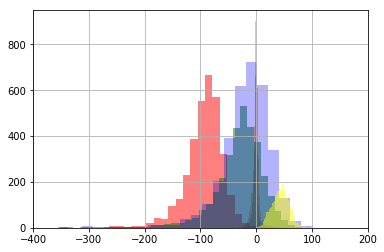

In [50]:
(((df_compare['vli2000']-df_compare['vli_00']).divide(df_compare['vli2000']))*100).hist(alpha=0.5, bins=binsize)
(((df_compare['li2000']-df_compare['li_00']).divide(df_compare['li2000']))*100).hist(alpha=0.5, bins=binsize)
(((df_compare['mi2000']-df_compare['mi_00']).divide(df_compare['mi2000']))*100).hist(alpha=0.5, bins=binsize,color='red')
(((df_compare['hmi2000']-df_compare['mhi_00']).divide(df_compare['hmi2000']))*100).hist(alpha=0.5, bins=binsize, color='green')
(((df_compare['hi2000']-df_compare['hi_00']).divide(df_compare['hi2000']))*100).hist(alpha=0.3, bins=binsize, color='blue')
(((df_compare['vhi2000']-df_compare['vhi_00']).divide(df_compare['vhi2000']))*100).hist(alpha=0.5, bins=binsize, color='yellow')
pl.xlim([-400,200])

(-1900, 200)

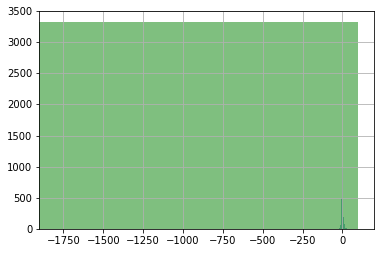

In [159]:
(((df_compare['vli1990']-df_compare['vli_90']).divide(df_compare['vli1990']))*100).hist(alpha=0.5, bins=binsize)
(((df_compare['li1990']-df_compare['li_90']).divide(df_compare['li1990']))*100).hist(alpha=0,bins=binsize)
(((df_compare['mi1990']-df_compare['mi_90']).divide(df_compare['mi1990']))*100).hist(alpha=0, bins=binsize, color='red')
(((df_compare['hmi1990']-df_compare['mhi_90']).divide(df_compare['hmi1990']))*100).hist(alpha=0.5, bins=binsize, color='green')
(((df_compare['hi1990']-df_compare['hi_90']).divide(df_compare['hi1990']+0.0001))*100).hist(alpha=0, bins=binsize,color='blue')
(((df_compare['vhi1990']-df_compare['vhi_90']).divide(df_compare['vhi1990']+0.0001))*100).hist(alpha=0, bins=binsize, color='yellow')
pl.xlim([-1900,200])

(-400, 200)

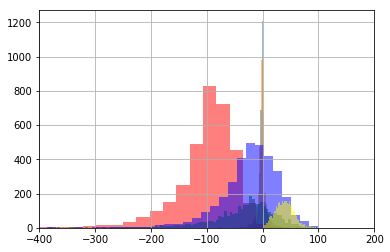

In [52]:
(((df_compare['vli2016']-df_compare['vli_16']).divide(df_compare['vli2016']))*100).hist(alpha=0.5,bins=binsize)
(((df_compare['li2016']-df_compare['li_16']).divide(df_compare['li2016']))*100).hist(alpha=0.5,bins=binsize)
(((df_compare['mi2016']-df_compare['mi_16']).divide(df_compare['mi2016']))*100).hist(alpha=0.5,bins=binsize, color='red')
(((df_compare['hmi2016']-df_compare['mhi_16']).divide(df_compare['hmi2016']))*100).hist(alpha=0.5, bins=400, color='green')
(((df_compare['hi2016']-df_compare['hi_16']).divide(df_compare['hi2016']+0.0001))*100).hist(alpha=0.5, bins=binsize, color='blue')
(((df_compare['vhi2016']-df_compare['vhi_16']).divide(df_compare['vhi2016']+0.0001))*100).hist(alpha=0.5, bins=binsize, color='yellow')
pl.xlim([-400,200])

In [ ]:
df_compare['vli_90'].hist(alpha=0.5,color='red')
df_compare['mi1990'].hist(alpha=0.5)

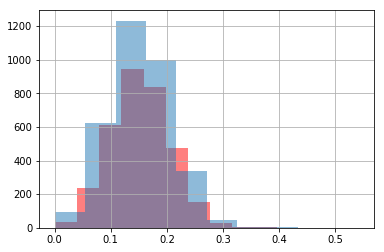

In [161]:
df_compare['li_90'].hist(alpha=0.5,color='red')
df_compare['li1990'].hist(alpha=0.5)

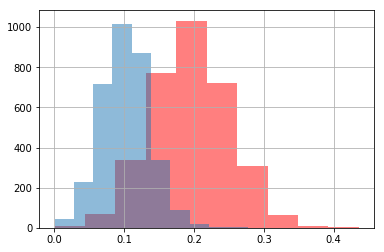

In [53]:
df_compare['mi_90'].hist(alpha=0.5,color='red')
df_compare['mi1990'].hist(alpha=0.5)

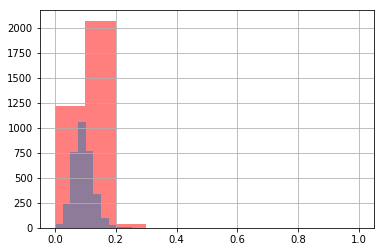

In [54]:
df_compare['mhi_90'].hist(alpha=0.5,color='red')
df_compare['hmi1990'].hist(alpha=0.5)

In [55]:
df_empd15 = df_empd15.set_index('GEOid2')
df_empd02 = df_empd02.set_index('GEOid2')

In [56]:
data = data.merge(df_empd15, left_index = True, right_index = True)
data = data.merge(df_empd02, left_index = True, right_index = True)

In [57]:
data = data.merge(df_tod[['TOD','TOD_pre_00','TOD_00_10','TOD_10']],left_index=True, right_index=True)

In [58]:
data = data.drop(columns=['Unnamed: 0_x','Unnamed: 0_y'])

## Dropping CT with population less than 500 (2016)

In [59]:
data = data[data['pop_16'] > 500]

### There are 6070 CT with population larger than 500 in 2016

In [60]:
len(data)

4533

## Dropping CT with more than 5 'Null' columns 

In [61]:
data = data[data.isnull().sum(axis=1) <= 5]
data.shape

(4533, 143)

----
## Calculating coefficient of variation of MOE
If any individual variable is missing, then the whole typology is missing.

**Tracts with a coefficient of variation > 20% on several key 2015 variables are flagged and determined unreliable:**
- Population -- V
- Housing units -- V
- Median rent -- V
- Median home value -- V
- Median income
- College count
- Renter count -- V

### Population

In [62]:
data = data[(data.pop_16_moe / 1.645 ) / data.pop_16 <= 0.3]

### Housing Units

In [63]:
data = data[(data.hu_16_moe / 1.645 ) / data.hu_16 <= 0.3]

In [64]:
data.shape

(4531, 143)

### Renter counts, Median rent, Median home value

In [65]:
data.columns

Index(['NAME', 'county', 'hh_00', 'hh_16', 'hh_16_moe', 'hh_90', 'hi_00',
       'hi_16', 'hi_16_moe', 'hi_90',
       ...
       'vli_mig_10_moe', 'vli_mig_16', 'vli_mig_16_moe', 'downtown', 'empd15',
       'empd02', 'TOD', 'TOD_pre_00', 'TOD_00_10', 'TOD_10'],
      dtype='object', length=143)

In [66]:
# dividing data to ct with majority of renters vs homeowners
datarent = data[data.per_rent_16 > 0.5]
dataowner = data[data.per_rent_16 <= 0.5]

# Renter count, ownership counts
datarent = datarent[(datarent.moe_renter16 / 1.645)  / datarent.rhu16 <= 0.3]
dataowner = dataowner[(dataowner.moe_owner16 / 1.645 ) / dataowner.ohu16 <= 0.3]

# Median rent, Median home value
datarent = datarent[(datarent.moe_mrent16 / 1.645)  / datarent.mrent16 <= 0.3]
dataowner = dataowner[(dataowner.moe_mhval16 / 1.645 ) / dataowner.mhval16 <= 0.3]

# concatenating two datasets back to 'data'
data = [dataowner, datarent]
data = pd.concat(data)
data.shape

### Median income -- no MOE in the data!

In [67]:
# ----

### Bachelors count

data = data[(data.moe_bachelors / 1.645 ) / data.bachelors <= 0.3]
data.shape

## 4,758 CT were found valid for the analysis -- 8.3% were dropped.

In [68]:
(5192-4758) / 5192

0.08359013867488443

### College count

In [69]:
# bachelors',
#  'moe_bachelors',
#  'masters',
#  'moe_masters',
#  'professional',
#  'moe_professionals',
#  'doctorate',
#  'moe_doctorates

(((data.moe_doctorates / 1.645 ) / data.doctorate) > 0.2).value_counts()

----
# _8 Typologies_ to be generated to the displacement map:
The typologies are:

### Low Income:
1. VLI - Highly Vulnerable >> _**an additional layer on top of assigned typologies**_
2. LI - Stable (Not Losing Low-Income Households)
3. LI - At Risk of Gentrification 
4. LI - Ongoing Gentrification 

### Moderate to High Income:
5. MHI - Advanced / Completed Gentrification
6. MHI - Stable (Not Losing Low-Income Households)
7. MHI - At Risk of Exclusion
8. MHI - Exclusion 

In [70]:
data.shape

(4531, 143)

In [71]:
print(data['pop_16'].mean())
print(data['pop_16'].std())

4272.650187596557
1862.5089900102955


# Create necessary variables:

## VLI - Very Low Income tract
- vhi2016

In [72]:
data.vhi_16.head()

34001000100    0.066628
34001000200    0.214115
34001000300    0.049244
34001000500    0.050739
34001001500    0.018519
Name: vhi_16, dtype: float64

In [73]:
# Calculating median for vli and vli % of all hh in tract

median_vli = data['vli_16'].median()
print("the median of very low income and very low income households at the year 2016 from total households, "  
      "of all census tracts is:", median_vli)

the median of very low income and very low income households at the year 2016 from total households, of all census tracts is: 0.23824982091690544


In [74]:
# VLI tract (2016)

data['vli_tract16'] = np.where(data['vli_16'] > 0.5, 1, 0)
data['vli_tract16'].value_counts()

0    4228
1     303
Name: vli_tract16, dtype: int64

## Low Income tract
- calculate the median % of all tracts
- Binary output (0 == low income tract; 1 = not a low income tract)

In [75]:
data.iloc[:,61:63].head()

,per_black_16,per_black_16_moe
34001000100,0.224279,0.070206
34001000200,0.092007,0.080447
34001000300,0.084710,0.075630
34001000500,0.041408,0.035412
34001001500,0.778217,0.286812


In [76]:
data.columns

Index(['NAME', 'county', 'hh_00', 'hh_16', 'hh_16_moe', 'hh_90', 'hi_00',
       'hi_16', 'hi_16_moe', 'hi_90',
       ...
       'vli_mig_16', 'vli_mig_16_moe', 'downtown', 'empd15', 'empd02', 'TOD',
       'TOD_pre_00', 'TOD_00_10', 'TOD_10', 'vli_tract16'],
      dtype='object', length=144)

In [77]:
# Calculating median for li and vli % of all hh in tract

medianli = data['vli_16'].median() + data['li_16'].median()
print("the median of low income and very low income households at the year 2016 from total households, "  
      "of all census tracts is:", medianli)

the median of low income and very low income households at the year 2016 from total households, of all census tracts is: 0.38791513871784555


In [78]:
data['vli_16'].median()

0.23824982091690544

In [79]:
# 2016

data['li_tract16'] = np.where(data['vli_16'] + data['li_16'] > medianli, 1, 0)
data.iloc[:,-1:].head(10)

,li_tract16
34001000100,1
34001000200,1
34001000300,1
34001000500,1
34001001500,1
34001001900,1
34001010101,0
34001010102,1
34001010200,0
34001010300,1


In [80]:
data['li_tract16'].value_counts()

1    2410
0    2121
Name: li_tract16, dtype: int64

In [81]:
# 2000

data['li_tract00'] = np.where(data['vli_00']+data['li_00'] > (data['vli_00'].median() + data['li_00'].median()), 1, 0)
data.iloc[:,-2:].head(10)

,li_tract16,li_tract00
34001000100,1,1
34001000200,1,1
34001000300,1,1
34001000500,1,1
34001001500,1,1
34001001900,1,1
34001010101,0,0
34001010102,1,1
34001010200,0,0
34001010300,1,0


In [82]:
# 1990

data['li_tract90'] = np.where(data['vli_90']+data['li_90'] > (data['vli_90'].median() + data['li_90'].median()), 1, 0)
data.iloc[:,-3:].head(10)

,li_tract16,li_tract00,li_tract90
34001000100,1,1,1
34001000200,1,1,0
34001000300,1,1,1
34001000500,1,1,1
34001001500,1,1,1
34001001900,1,1,1
34001010101,0,0,0
34001010102,1,1,1
34001010200,0,0,0
34001010300,1,0,0


In [83]:
print('LI HH 2000:\n', data['li_tract00'].value_counts())
print('\nLI HH 1990:\n', data['li_tract90'].value_counts())

LI HH 2000:
 1    2341
0    2190
Name: li_tract00, dtype: int64

LI HH 1990:
 1    2396
0    2135
Name: li_tract90, dtype: int64


### Define % college educated < regional median 

In [84]:
data['per_col_00'].median()

0.1450708269891789

In [85]:
data['edulow90'] = np.where(data['per_col_90'] < data['per_col_90'].median(), 1, 0)
data['edulow00'] = np.where(data['per_col_00'] < data['per_col_00'].median(), 1, 0)
data.iloc[:,-4:].head(7)

,li_tract00,li_tract90,edulow90,edulow00
34001000100,1,1,1,1
34001000200,1,0,0,1
34001000300,1,1,1,1
34001000500,1,1,1,1
34001001500,1,1,1,1
34001001900,1,1,1,1
34001010101,0,0,0,0


### Define % renters > regional median

In [86]:
data['per_rent_00'].median()

0.4101221640488657

In [87]:
data['renters%90'] = np.where(data['per_rent_90'] > data['per_rent_90'].median(), 1, 0)
data['renters%00'] = np.where(data['per_rent_00'] > data['per_rent_00'].median(), 1, 0)
data['renters%16'] = np.where(data['per_rent_16'] > data['per_rent_16'].median(), 1, 0)

data.iloc[:,-5:].head(7)

,edulow90,edulow00,renters%90,renters%00,renters%16
34001000100,1,1,1,1,1
34001000200,0,1,0,1,1
34001000300,1,1,1,1,1
34001000500,1,1,1,1,1
34001001500,1,1,1,1,1
34001001900,1,1,1,1,1
34001010101,0,0,0,0,0


### Define % nonwhite > regional median

In [88]:
data['per_nonwhite_00'].median()

0.20487232169063696

In [89]:
data['nonwhiteHigh90'] = np.where(data['per_nonwhite_90'] > data['per_nonwhite_90'].median(), 1, 0)
data['nonwhiteHigh00'] = np.where(data['per_nonwhite_00'] > data['per_nonwhite_00'].median(), 1, 0)
data['nonwhiteHigh16'] = np.where(data['per_nonwhite_16'] > data['per_nonwhite_16'].median(), 1, 0)
data.iloc[:,-5:].head(7)

,renters%00,renters%16,nonwhiteHigh90,nonwhiteHigh00,nonwhiteHigh16
34001000100,1,1,0,1,0
34001000200,1,1,0,1,0
34001000300,1,1,0,1,0
34001000500,1,1,0,1,0
34001001500,1,1,0,1,0
34001001900,1,1,0,1,0
34001010101,0,0,0,0,0


### Define Severe Rent Burden 2016 -- DIDN"T WORK! CHECK AGAIN

In [90]:
data[data['mrent_16']/(data['hinc_16']/12)<0.3].head()

,NAME,county,hh_00,hh_16,hh_16_moe,hh_90,hi_00,hi_16,hi_16_moe,hi_90,...,li_tract00,li_tract90,edulow90,edulow00,renters%90,renters%00,renters%16,nonwhiteHigh90,nonwhiteHigh00,nonwhiteHigh16
34001001500,"Census Tract 15, Atlantic County, New Jersey",1,905.0000,756.0,63.0,1100.000000,0.028655,0.015003,0.019253,0.025767,...,1,1,1,1,1,1,1,0,1,0
34001010101,"Census Tract 101.01, Atlantic County, New Jersey",1,1775.9435,1447.0,126.0,1463.028167,0.133982,0.149099,0.074351,0.194003,...,0,0,0,0,0,0,0,0,0,0
34001010102,"Census Tract 101.02, Atlantic County, New Jersey",1,1207.0565,960.0,90.0,1232.971833,0.103076,0.104324,0.058704,0.119610,...,1,1,1,1,0,0,0,0,0,0
34001010200,"Census Tract 102, Atlantic County, New Jersey",1,2062.0000,2260.0,146.0,1942.000000,0.164282,0.139873,0.065387,0.189860,...,0,0,0,0,0,0,0,0,0,0
34001010501,"Census Tract 105.01, Atlantic County, New Jersey",1,2584.0000,3006.0,193.0,1909.465780,0.170297,0.125992,0.046679,0.154425,...,0,0,0,0,0,0,0,1,0,0


# Vulnerability 1990 / 2000 // 3 out of 4 of the above for each year
- % low income households > regional median
- college educated < regional median
- renters > regional median
- nonwhite > regional median

In [91]:
# vulnerable 1990

def volnurable90(df):
    if df['li_tract90'] == 1 and df['edulow90'] == 1 and df['renters%90'] == 1:
        val = 1
    elif df['li_tract90'] == 1 and df['edulow90'] == 1 and df['nonwhiteHigh90'] == 1:
        val = 1
    elif df['li_tract90'] == 1 and df['renters%90'] == 1 and df['nonwhiteHigh90'] == 1:
        val = 1
    elif df['edulow90'] == 1 and df['renters%90'] == 1 and df['nonwhiteHigh90'] == 1:
        val = 1
    else:
        val = 0
    return val

In [92]:
data['Volnurable90'] = data.apply(volnurable90, axis=1)
data[10:16]

,NAME,county,hh_00,hh_16,hh_16_moe,hh_90,hi_00,hi_16,hi_16_moe,hi_90,...,li_tract90,edulow90,edulow00,renters%90,renters%00,renters%16,nonwhiteHigh90,nonwhiteHigh00,nonwhiteHigh16,Volnurable90
34001010501,"Census Tract 105.01, Atlantic County, New Jersey",1,2584.0,3006.0,193.0,1909.465780,0.170297,0.125992,0.046679,0.154425,...,0,0,0,0,0,0,1,0,0,0
34001010401,"Census Tract 104.01, Atlantic County, New Jersey",1,1751.0,2081.0,155.0,1546.967226,0.170828,0.143431,0.080781,0.191879,...,0,0,1,0,0,0,1,0,0,0
34001010403,"Census Tract 104.03, Atlantic County, New Jersey",1,1269.0,2074.0,125.0,795.000000,0.166826,0.166098,0.086058,0.148148,...,0,1,1,0,0,0,1,1,0,0
34001010503,"Census Tract 105.03, Atlantic County, New Jersey",1,2733.0,3022.0,179.0,1792.566801,0.132269,0.090868,0.048834,0.192639,...,0,0,0,1,1,1,1,1,0,0
34001010600,"Census Tract 106, Atlantic County, New Jersey",1,1659.0,1415.0,139.0,1680.000000,0.089424,0.126702,0.059236,0.097338,...,1,1,1,0,0,1,1,1,0,1
34001010700,"Census Tract 107, Atlantic County, New Jersey",1,2037.0,2254.0,166.0,1903.000000,0.162406,0.162869,0.069137,0.126118,...,0,1,1,0,0,0,1,0,0,0


In [93]:
# Volnurable 2000

def volnurable00(df):
    if df['li_tract00'] == 1 and df['edulow00'] == 1 and df['renters%00'] == 1:
        val = 1
    elif df['li_tract00'] == 1 and df['edulow00'] == 1 and df['nonwhiteHigh00'] == 1:
        val = 1
    elif df['li_tract00'] == 1 and df['renters%00'] == 1 and df['nonwhiteHigh00'] == 1:
        val = 1
    elif df['edulow00'] == 1 and df['renters%00'] == 1 and df['nonwhiteHigh00'] == 1:
        val = 1
    else:
        val = 0
    return val

In [94]:
data['Volnurable00'] = data.apply(volnurable00, axis=1)
data[10:16]

,NAME,county,hh_00,hh_16,hh_16_moe,hh_90,hi_00,hi_16,hi_16_moe,hi_90,...,edulow90,edulow00,renters%90,renters%00,renters%16,nonwhiteHigh90,nonwhiteHigh00,nonwhiteHigh16,Volnurable90,Volnurable00
34001010501,"Census Tract 105.01, Atlantic County, New Jersey",1,2584.0,3006.0,193.0,1909.465780,0.170297,0.125992,0.046679,0.154425,...,0,0,0,0,0,1,0,0,0,0
34001010401,"Census Tract 104.01, Atlantic County, New Jersey",1,1751.0,2081.0,155.0,1546.967226,0.170828,0.143431,0.080781,0.191879,...,0,1,0,0,0,1,0,0,0,0
34001010403,"Census Tract 104.03, Atlantic County, New Jersey",1,1269.0,2074.0,125.0,795.000000,0.166826,0.166098,0.086058,0.148148,...,1,1,0,0,0,1,1,0,0,0
34001010503,"Census Tract 105.03, Atlantic County, New Jersey",1,2733.0,3022.0,179.0,1792.566801,0.132269,0.090868,0.048834,0.192639,...,0,0,1,1,1,1,1,0,0,0
34001010600,"Census Tract 106, Atlantic County, New Jersey",1,1659.0,1415.0,139.0,1680.000000,0.089424,0.126702,0.059236,0.097338,...,1,1,0,0,1,1,1,0,1,1
34001010700,"Census Tract 107, Atlantic County, New Jersey",1,2037.0,2254.0,166.0,1903.000000,0.162406,0.162869,0.069137,0.126118,...,1,1,0,0,0,1,0,0,0,0


In [95]:
data['Volnurable90'].value_counts()

0    3101
1    1430
Name: Volnurable90, dtype: int64

In [96]:
data['Volnurable00'].value_counts()

0    2665
1    1866
Name: Volnurable00, dtype: int64

### 2123 census tracts were found Volnurable in 1990, while 2159 were found Volnurable in 2000

---

### Rail station (TOD)

In [97]:
len(data)

4531

In [98]:
len(df_aram)

5306

In [99]:
len(df_compare)

3331

In [100]:
df_aram

,GEOid2,hh16,moe_hh16,per_col00,per_nonwhite00,per_rent00,vli2000,li2000,mi2000,hmi2000,...,moe_professionals,doctorate,moe_doctorates,per_col_16,pop90,per_col90,moe_hu16,hinc16,moe_hinc16,popgrowth
0,9001010101,1348.0,106.0,0.633120,0.066080,0.128119,0.097024,0.082058,5.861734e-02,0.036841,...,104.0,36.0,30.0,0.619597,4277.000000,0.516292,84.0,150655.0,21659.0,-529.000000
1,9001010102,1293.0,100.0,0.748477,0.098972,0.108108,0.097878,0.055028,5.778028e-02,0.040756,...,120.0,69.0,49.0,0.784978,4273.694824,0.619490,71.0,250000.0,NaN,-302.000000
2,9001010201,991.0,75.0,0.704225,0.088501,0.137864,0.055506,0.036763,2.729502e-02,0.033678,...,62.0,98.0,63.0,0.761389,3156.218236,0.602177,53.0,212448.0,58671.0,-158.000000
3,9001010202,1856.0,99.0,0.621305,0.130701,0.213789,0.127129,0.112302,7.260491e-02,0.062817,...,76.0,55.0,30.0,0.662879,4725.289978,0.597040,82.0,187875.0,31078.0,328.000000
4,9001010300,1435.0,111.0,0.716889,0.103641,0.273834,0.095201,0.074789,5.868396e-02,0.052763,...,100.0,82.0,43.0,0.805446,4036.000000,0.647751,85.0,221250.0,44939.0,-71.000000
5,9001010400,2031.0,131.0,0.386971,0.108092,0.284145,0.137449,0.164956,1.029238e-01,0.084831,...,113.0,65.0,53.0,0.560970,5008.000000,0.306302,78.0,107965.0,5325.0,731.000000
6,9001010500,2420.0,138.0,0.367483,0.305088,0.713533,0.287293,0.197065,9.789991e-02,0.060034,...,113.0,66.0,64.0,0.441980,5036.366920,0.326247,91.0,65593.0,18929.0,409.000000
7,9001010600,1014.0,68.0,0.641026,0.188206,0.634083,0.173468,0.143679,1.008366e-01,0.097035,...,42.0,43.0,43.0,0.692042,2278.000000,0.453947,46.0,93810.0,18659.0,-335.000000
8,9001010700,1696.0,99.0,0.454577,0.231968,0.448023,0.369338,0.132503,5.256808e-02,0.057491,...,90.0,30.0,22.0,0.532816,3506.000000,0.403734,59.0,73831.0,8917.0,-55.000000
9,9001010800,1257.0,83.0,0.575166,0.132900,0.294246,0.158756,0.140192,8.193216e-02,0.072376,...,38.0,91.0,52.0,0.734987,3662.373779,0.374056,60.0,128494.0,17201.0,-10.000000


ct=[]
for i in df_aram.GEOid2:
    flag=0
    for j in df_compare.GEOid2:
        if i == j:
            flag=1
            ct.append(1)
            break
    if flag==0:
        ct.append(0)

## Define % of units in pre-1950 buildings > regional median

In [101]:
data['units_pre50_High'] = np.where(data['per_units_pre50_16'] > data['per_units_pre50_16'].median(), 1, 0)
data.iloc[:,-3:].head(7)

,Volnurable90,Volnurable00,units_pre50_High
34001000100,1,1,1
34001000200,0,1,0
34001000300,1,1,1
34001000500,1,1,1
34001001500,1,1,0
34001001900,1,1,0
34001010101,0,0,0


## Define Employment density (2015) > regional median

In [102]:
data['empdens14_High'] = np.where(data['empd15'] > data['empd15'].median(), 1, 0)
data.iloc[:,-3:].head(7)

,Volnurable00,units_pre50_High,empdens14_High
34001000100,1,1,0
34001000200,1,0,0
34001000300,1,1,0
34001000500,1,1,0
34001001500,1,0,0
34001001900,1,0,0
34001010101,0,0,0


## Define rent change 00-16 and home value change 00-16 > regional median

In [103]:
data['mrent90_00'] = data['mrent_00'] - data['mrent_90']

In [104]:
data['mrent00_16'] = data['mrent_16'] - data['mrent_00']

In [105]:
data['mhval90_00'] = data['mhval_00'] - data['mhval_90']

In [106]:
data['mhval00_16'] = data['mhval_16'] - data['mhval_00']

In [107]:
# 1990 base
data['rentchange_High90'] = np.where(data['mrent90_00'] > data['mrent90_00'].median(), 1, 0)
data['rhomeValchange_High90'] = np.where(data['mhval90_00'] > data['mhval90_00'].median(), 1, 0)

# 2000 base
data['rentchange_High00'] = np.where(data['mrent00_16'] > data['mrent00_16'].median(), 1, 0)
data['rhomeValchange_High00'] = np.where(data['mhval00_16'] > data['mhval00_16'].median(), 1, 0)

data.iloc[:,-5:].head(7)

,mhval00_16,rentchange_High90,rhomeValchange_High90,rentchange_High00,rhomeValchange_High00
34001000100,95300.00000,0,0,0,0
34001000200,104500.00000,0,0,0,0
34001000300,81000.00000,1,1,0,0
34001000500,80400.00000,0,0,0,0
34001001500,93400.00000,0,0,0,0
34001001900,-143200.00000,0,1,0,0
34001010101,188509.26052,0,1,1,1


## Define "Hot Market"
one out of two options of changing market (rent / home value)

In [108]:
def hotmarket90(df):
    if df['rentchange_High90'] == 1 or df['rhomeValchange_High90'] == 1 and df['rentchange_High90'] == 1:
        val = 1
    else:
        val = 0
    return val

In [109]:
def hotmarket00(df):
    if df['rentchange_High00'] == 1 or df['rhomeValchange_High00'] == 1 and df['rentchange_High00'] == 1:
        val = 1
    else:
        val = 0
    return val

In [110]:
data['hotmarket90'] = data.apply(hotmarket90, axis=1)
data['hotmarket00'] = data.apply(hotmarket00, axis=1)
data.iloc[:,-6:].head(7)

,rentchange_High90,rhomeValchange_High90,rentchange_High00,rhomeValchange_High00,hotmarket90,hotmarket00
34001000100,0,0,0,0,0,0
34001000200,0,0,0,0,0,0
34001000300,1,1,0,0,1,0
34001000500,0,0,0,0,0,0
34001001500,0,0,0,0,0,0
34001001900,0,1,0,0,0,0
34001010101,0,1,1,1,0,1


## Define risk0
2 out of the 4 of the following is true in 2016 (select only one 'hot market' from the 2 'hot market' option)
- Has rail station in tract
- % of units in pre-1950 buildings > regional median
- Employment density (2014)> regional median
- “Hot market”

In [111]:
# risk 1990

def risk90(df):
    if df['TOD'] == 1 and df['units_pre50_High'] == 1 and df['empdens14_High'] == 1:
        val = 1
    elif df['TOD'] == 1 and df['units_pre50_High'] == 1 and df['hotmarket90'] == 1:
        val = 1
    elif df['TOD'] == 1 and df['empdens14_High'] == 1 and df['hotmarket90'] == 1:
        val = 1
    elif df['units_pre50_High'] == 1 and df['empdens14_High'] == 1 and df['hotmarket90'] == 1:
        val = 1
    else:
        val = 0
    return val

In [112]:
# risk 2000

def risk00(df):
    if df['TOD'] == 1 and df['units_pre50_High'] == 1 and df['empdens14_High'] == 1:
        val = 1
    elif df['TOD'] == 1 and df['units_pre50_High'] == 1 and df['hotmarket00'] == 1:
        val = 1
    elif df['TOD'] == 1 and df['empdens14_High'] == 1 and df['hotmarket00'] == 1:
        val = 1
    elif df['units_pre50_High'] == 1 and df['empdens14_High'] == 1 and df['hotmarket00'] == 1:
        val = 1
    else:
        val = 0
    return val

In [113]:
df_aram['TOD']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       1.0
8       0.0
9       1.0
10      0.0
11      1.0
12      1.0
13      0.0
14      0.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0
20      0.0
21      0.0
22      0.0
23      0.0
24      1.0
25      1.0
26      0.0
27      0.0
28      0.0
29      0.0
       ... 
5276    1.0
5277    0.0
5278    0.0
5279    0.0
5280    0.0
5281    0.0
5282    1.0
5283    0.0
5284    0.0
5285    0.0
5286    0.0
5287    0.0
5288    0.0
5289    0.0
5290    0.0
5291    0.0
5292    0.0
5293    0.0
5294    0.0
5295    0.0
5296    0.0
5297    0.0
5298    0.0
5299    0.0
5300    1.0
5301    0.0
5302    0.0
5303    0.0
5304    0.0
5305    0.0
Name: TOD, Length: 5306, dtype: float64

In [114]:
data['risk90'] = data.apply(risk90, axis=1)
data['risk90'].value_counts()

0    3354
1    1177
Name: risk90, dtype: int64

In [115]:
data['risk00'] = data.apply(risk00, axis=1)
data['risk00'].value_counts()

0    3363
1    1168
Name: risk00, dtype: int64

In [116]:
# create a df with only low income tracts

df_LI = data[data['li_tract16'] == 1]
df_LI.shape

(2410, 171)

### There are 2760 LI tracts in the NY region in 2016

## recalculating popgrowth 90-00; 00-16

In [117]:
# recalculating popgrowth 90-00; 00-16
data['popgrowth90-00'] = data['pop_00'] - data['pop_90']
data['popgrowth00-16'] = data['pop_16'] - data['pop_00']

data.iloc[:,-3:].head(3)

,risk00,popgrowth90-00,popgrowth00-16
34001000100,0,231.0,141.0
34001000200,0,628.0,-165.0
34001000300,0,842.0,789.0


## Define Population stable or growing 1990-2000; 2000-2016  ( >= 0 )

In [118]:
data['pgrowth90-00_High'] = np.where(data['popgrowth90-00'] >= 0, 1, 0)
data['pgrowth00-16_High'] = np.where(data['popgrowth00-16'] >= 0, 1, 0)
data.iloc[:,-4:].head()

,popgrowth90-00,popgrowth00-16,pgrowth90-00_High,pgrowth00-16_High
34001000100,231.0,141.0,1,1
34001000200,628.0,-165.0,1,0
34001000300,842.0,789.0,1,1
34001000500,565.0,440.0,1,1
34001001500,-512.0,-148.0,0,0


## Define Loss of LI households 1990-2000; 2000-2016 (absolute loss)
- ch_all_li_count90_00 < 0
- ch_all_li_count00_16 < 0

In [119]:
data['ch_all_li_count90_00'] = data['vli_00'] + data['li_00'] - data['vli_90'] - data['li_90']

In [120]:
data['ch_all_li_count00_16'] = data['vli_16'] + data['li_16'] - data['vli_00'] - data['li_00']

In [121]:
data['lossLI90-00'] = np.where(data['ch_all_li_count90_00'] < 0, 1, 0)
data['lossLI00-16'] = np.where(data['ch_all_li_count00_16'] < 0, 1, 0)

data.iloc[:,-3:].head()

,ch_all_li_count00_16,lossLI90-00,lossLI00-16
34001000100,0.072775,0,0
34001000200,0.089685,0,0
34001000300,0.119947,1,0
34001000500,0.160070,1,0
34001001500,-0.005158,0,1


## Define LI migration rate in 2015 < in 2009

per_limove09 > per_limove16

In [122]:
np.sort(df_aram.columns)

array(['GEOid2', 'TOD', 'ag25up', 'all_li_count00', 'all_li_count16',
       'all_li_count90', 'bachelors', 'ch_all_li_count00_16',
       'ch_all_li_count90_00', 'co_med_indinc16', 'denominator',
       'doctorate', 'empd15', 'hh00', 'hh16', 'hi1990', 'hi2000',
       'hi2016', 'hinc16', 'hmi1990', 'hmi2000', 'hmi2016', 'hu16',
       'li1990', 'li2000', 'li2016', 'masters', 'mhval00', 'mhval00_16',
       'mhval16', 'mhval90', 'mhval90_00', 'mi1990', 'mi2000', 'mi2016',
       'moe_bachelors', 'moe_doctorates', 'moe_hh16', 'moe_hinc16',
       'moe_hu16', 'moe_masters', 'moe_mhval16', 'moe_mrent16',
       'moe_owner16', 'moe_pop16', 'moe_professionals', 'moe_renter16',
       'moveinincd16', 'mrent00', 'mrent00_16', 'mrent16', 'mrent90',
       'mrent90_00', 'ohu00', 'ohu16', 'ohu90', 'per_all_li00',
       'per_all_li16', 'per_all_li90', 'per_col00', 'per_col90',
       'per_col_16', 'per_limove09', 'per_limove16', 'per_nonwhite00',
       'per_nonwhite16', 'per_nonwhite90', 'per_r

In [123]:
data['moveinLI_decrease00'] = np.where(data['per_all_li_mig_16'] < data['per_all_li_mig_10'], 1, 0)
data.iloc[:,-3:].head()

,lossLI90-00,lossLI00-16,moveinLI_decrease00
34001000100,0,0,0
34001000200,0,0,0
34001000300,1,0,0
34001000500,1,0,0
34001001500,0,1,0


## Change in college educators % 90-00, 00-16

In [124]:
data['edu_change90-00'] = data['per_col_00'] - data['per_col_90']
data['edu_change00-16'] = data['per_col_16'] - data['per_col_00']

data.iloc[:,-3:].head()

,moveinLI_decrease00,edu_change90-00,edu_change00-16
34001000100,0,0.026653,0.501151
34001000200,0,-0.073290,0.630765
34001000300,0,0.046627,0.530168
34001000500,0,-0.001909,0.535628
34001001500,0,0.020533,0.568357


## Define Educated growth > region median

In [125]:
data['edugrowth_High90'] = np.where(data['edu_change90-00'] > data['edu_change90-00'].median(), 1, 0)
data['edugrowth_High00'] = np.where(data['edu_change00-16'] > data['edu_change00-16'].median(), 1, 0)

data.iloc[:,-3:].head()

,edu_change00-16,edugrowth_High90,edugrowth_High00
34001000100,0.501151,1,0
34001000200,0.630765,0,1
34001000300,0.530168,1,0
34001000500,0.535628,0,0
34001001500,0.568357,0,1


## Define Growth in real median household income (percent change) > regional median (90 and 00)

In [126]:
np.sort(list(data.columns))

array(['NAME', 'TOD', 'TOD_00_10', 'TOD_10', 'TOD_pre_00', 'Volnurable00',
       'Volnurable90', 'ch_all_li_count00_16', 'ch_all_li_count90_00',
       'county', 'downtown', 'edu_change00-16', 'edu_change90-00',
       'edugrowth_High00', 'edugrowth_High90', 'edulow00', 'edulow90',
       'empd02', 'empd15', 'empdens14_High', 'hh_00', 'hh_16',
       'hh_16_moe', 'hh_90', 'hi_00', 'hi_16', 'hi_16_moe', 'hi_90',
       'hi_mig_10', 'hi_mig_10_moe', 'hi_mig_16', 'hi_mig_16_moe',
       'hinc_00', 'hinc_16', 'hinc_16_moe', 'hinc_90', 'hotmarket00',
       'hotmarket90', 'hu_00', 'hu_16', 'hu_16_moe', 'hu_90', 'li_00',
       'li_16', 'li_16_moe', 'li_90', 'li_mig_10', 'li_mig_10_moe',
       'li_mig_16', 'li_mig_16_moe', 'li_tract00', 'li_tract16',
       'li_tract90', 'lossLI00-16', 'lossLI90-00', 'mhi_00', 'mhi_16',
       'mhi_16_moe', 'mhi_90', 'mhi_mig_10', 'mhi_mig_10_moe',
       'mhi_mig_16', 'mhi_mig_16_moe', 'mhval00_16', 'mhval90_00',
       'mhval_00', 'mhval_16', 'mhval_16_m

In [127]:
data['pct_ch_hinc90_00'] = data['hinc_00'] - data['hinc_90']

In [128]:
data['pct_ch_hinc00_16'] = data['hinc_16'] - data['hinc_00']

In [129]:
data['hhIncomeGrowthHigh90'] = np.where(data['pct_ch_hinc90_00'] > data['pct_ch_hinc90_00'].median(), 1, 0)
data['hhIncomeGrowthHigh00'] = np.where(data['pct_ch_hinc00_16'] > data['pct_ch_hinc00_16'].median(), 1, 0)

data.iloc[:,-4:].head()

,pct_ch_hinc90_00,pct_ch_hinc00_16,hhIncomeGrowthHigh90,hhIncomeGrowthHigh00
34001000100,225.0,3029.0,0,0
34001000200,3538.0,3118.0,0,0
34001000300,12997.0,-288.0,1,0
34001000500,10685.0,-1982.0,0,0
34001001500,846.0,7198.0,0,0


## Define  Demographic change 90-00, 00-16 (2 out of 3 factors)

In [130]:
# Demographic change 90-00

def Dchange90(df):
    if df['edugrowth_High90'] == 1 and df['hhIncomeGrowthHigh90'] == 1:
        val = 1
    elif df['edugrowth_High90'] == 1 and df['lossLI90-00'] == 1:
        val = 1
    elif df['hhIncomeGrowthHigh90'] == 1 and df['lossLI90-00'] == 1:
        val = 1
    else:
        val = 0
    return val

In [131]:
# Demographic change 00-16

def Dchange00(df):
    if df['edugrowth_High00'] == 1 and df['hhIncomeGrowthHigh00'] == 1:
        val = 1
    elif df['edugrowth_High00'] == 1 and df['lossLI00-16'] == 1:
        val = 1
    elif df['hhIncomeGrowthHigh00'] == 1 and df['lossLI00-16'] == 1:
        val = 1
    else:
        val = 0
    return val

In [132]:
data['Dchange90'] = data.apply(Dchange90, axis=1)
data['Dchange00'] = data.apply(Dchange00, axis=1)

data.iloc[:,-3:].head()

,hhIncomeGrowthHigh00,Dchange90,Dchange00
34001000100,0,0,0
34001000200,0,0,0
34001000300,0,1,0
34001000500,0,0,0
34001001500,0,0,1


# Gentrified 90 + Gentrified 00

In [133]:
data['Gentrified90'] = np.where((data['Volnurable90'] == 1) & (data['Dchange90'] == 1) &
                                (data['hotmarket90'] == 1), 1, 0)
data['Gentrified00'] = np.where((data['Volnurable00'] == 1) & (data['Dchange00'] == 1) &
                                (data['hotmarket00'] == 1) & (data['moveinLI_decrease00'] == 1), 1, 0)

data.iloc[10:16,-3:]

,Dchange00,Gentrified90,Gentrified00
34001010501,0,0,0
34001010401,1,0,0
34001010403,0,0,0
34001010503,0,0,0
34001010600,1,0,0
34001010700,1,0,0


In [134]:
data.iloc[:,-44:].columns

Index(['edulow00', 'renters%90', 'renters%00', 'renters%16', 'nonwhiteHigh90',
       'nonwhiteHigh00', 'nonwhiteHigh16', 'Volnurable90', 'Volnurable00',
       'units_pre50_High', 'empdens14_High', 'mrent90_00', 'mrent00_16',
       'mhval90_00', 'mhval00_16', 'rentchange_High90',
       'rhomeValchange_High90', 'rentchange_High00', 'rhomeValchange_High00',
       'hotmarket90', 'hotmarket00', 'risk90', 'risk00', 'popgrowth90-00',
       'popgrowth00-16', 'pgrowth90-00_High', 'pgrowth00-16_High',
       'ch_all_li_count90_00', 'ch_all_li_count00_16', 'lossLI90-00',
       'lossLI00-16', 'moveinLI_decrease00', 'edu_change90-00',
       'edu_change00-16', 'edugrowth_High90', 'edugrowth_High00',
       'pct_ch_hinc90_00', 'pct_ch_hinc00_16', 'hhIncomeGrowthHigh90',
       'hhIncomeGrowthHigh00', 'Dchange90', 'Dchange00', 'Gentrified90',
       'Gentrified00'],
      dtype='object')

---

# Assign typologies to census tracts

----
# 1. _VLI - Highly Vulnerable_

In [135]:
data['VLI'] = np.where((data['vli_tract16'] == 1) & (data['renters%16'] == 1), 1, 0) 
data['VLI'].value_counts()

0    4231
1     300
Name: VLI, dtype: int64

# _5. MHI - Advanced / Completed Gentrification_
    - Pop in 2000>500
    - Moderate to High Income Tract in 2015
    - Gentrified in in 1990-2000 or 2000-2015 (Defined in Appendix)

In [136]:
# Advanced Gentrification (Moderate to High Income)

def AdvancedGen(df):
    if df['li_tract16'] == 0 and df['Gentrified90'] == 1 and df['VLI'] == 0:
        val = 1
    elif df['li_tract16'] == 0 and df['Gentrified00'] == 1 and df['VLI'] == 0:
        val = 1
    else:
        val = 0
    return val

In [137]:
data['AdvancedGen'] = data.apply(AdvancedGen, axis=1)
data['AdvancedGen'].value_counts()

0    4459
1      72
Name: AdvancedGen, dtype: int64

# _4. LI - Ongoing Gentrification_

    - Pop in 2000 > 500
    - Low Income Tract in 2016
    - Vulnerable in 2000 (Defined in Appendix)
    - Population stable or growing 2000-2016
    - Loss of LI households 2000-2016 (absolute loss)
    - Either:
        o “Hot market” (Defined in Appendix)
        o LI migration rate (percent of all migration to tract that was LI)
    in 2016 < in 2009
    - Gentrified in 1990-2000 or 2000-2016 (Defined in Appendix)

In [138]:
# Displacement of LowIncome Households/Ongoing Gentrification (Low Income)

def OngoingGenLI(df):
    # gentrified in 90, LI tract in 2015
    if df['li_tract16'] == 1 and df['Gentrified90'] == 1 and df['AdvancedGen'] == 0:
        val = 1
    # gentrified in 00, LI tract in 2015
    elif df['li_tract16'] == 1 and df['Gentrified00'] == 1 and df['AdvancedGen'] == 0:
        val = 1
    # LI tract in 2016; Vulnerable in 2000; pop growth; Loss of LI households; hot market in 90
    elif df['li_tract16'] == 1 and df['Volnurable00'] == 1 and df['popgrowth00-16'] == 1\
        and df['lossLI00-16'] == 1  and df['hotmarket90'] == 1 and df['AdvancedGen'] == 0:
        val = 1
    # LI tract in 2016; Vulnerable in 2000; pop growth; Loss of LI households; hot market in 00
    elif df['li_tract16'] == 1 and df['Volnurable00'] == 1 and df['popgrowth00-16'] == 1\
        and df['lossLI00-16'] == 1 and df['hotmarket00'] == 1 and df['AdvancedGen'] == 0:
        val = 1
    #     # LI tract in 2016; Vulnerable in 2000; pop growth; Loss of LI households; LI migration rate
    elif df['li_tract16'] == 1 and df['Volnurable00'] == 1 and df['popgrowth00-16'] == 1\
        and df['lossLI00-16'] == 1 and df['moveinLI_decrease00'] == 1 and df['AdvancedGen'] == 0:
        val = 1
    else:
        val = 0
    return val

In [139]:
data['OngoingGenLI'] = data.apply(OngoingGenLI, axis=1)
data['OngoingGenLI'].value_counts()

0    4357
1     174
Name: OngoingGenLI, dtype: int64

# _3. LI - At Risk of Gentrification _
    - Volnurable in 2000 (3 out of 4 variables)
    - Not currently undergoing displacement or ongoing gentrification
    - 2 out of the 4 of the following is true in 2015( select only one 'hot market' from the 2 'hot market' option)
    - Not currently undergoing displacement or ongoing gentrification

In [140]:
data['AtRiskGen'] = np.where((data['li_tract16'] == 1) & (data['Volnurable00'] == 1) &
                            (data['risk00'] == 1) & (data['OngoingGenLI'] == 0), 1, 0)

data['AtRiskGen'].value_counts()

0    4088
1     443
Name: AtRiskGen, dtype: int64

# 2. _LI - Stable (Not losing LI hh)_
   -  _'pop00'_ (>500)
   - Low Income tract in 2015
   - Not classified as At Risk of, Ongoing, or Advanced Gentrification

In [141]:
data['NotloseLI'] = np.where((data['li_tract16'] == 1) & (data['AtRiskGen'] == 0) &
                             (data['OngoingGenLI'] == 0) & (data['AdvancedGen'] == 0), 1, 0)

data['NotloseLI'].value_counts()

0    2738
1    1793
Name: NotloseLI, dtype: int64

---

# _8. MHI - Exclusion_
    - Pop in 2000 > 500
    - Moderate to High Income Tract in 2015
    - <20% LI in 2000 
    - % LI in 2016 < % LI in 2000
    - LI migration < regional median in 2015

In [142]:
data['LI<20%'] = np.where(data['li_16']+data['vli_16'] < 0.2, 1, 0)
data['%LIdecrease'] = np.where(data['li_16'] < data['li_00'], 1, 0)
data['migLI_low'] = np.where(data['per_all_li_mig_16'] < data['per_all_li_mig_10'].median(), 1, 0)

data.iloc[:,-3:].head(4)

,LI<20%,%LIdecrease,migLI_low
34001000100,0,1,0
34001000200,0,0,0
34001000300,0,1,0
34001000500,0,0,0


In [143]:
# Advanced Exclusion

def Exclusion(df):
    if df['li_tract16'] == 0 and df['LI<20%'] == 1 and df['%LIdecrease'] == 1 and df['migLI_low'] == 1:
        val = 1
    else:
        val = 0
    return val

In [144]:
data['Exclusion'] = data.apply(Exclusion, axis=1)
data['Exclusion'].value_counts()

0    4333
1     198
Name: Exclusion, dtype: int64

# _7. MHI - At Risk of Exclusion_

    - Pop in 2000 > 500
    - Moderate to High Income Tract in 2015
    - 2 out of the 4 of the following is true in 2015:
        o Has rail station in tract
        o % of units in prewar buildings (1950) > regional median
        o Employment density> regional median
        o “Hot market” (options defined below table)
    - Not currently undergoing exclusion – none of the below classifications are met

In [145]:
data['AtRiskExc'] = np.where((data['li_tract16'] == 0) & (data['risk00'] == 1) &
                            (data['Exclusion'] == 0), 1, 0)

data['AtRiskExc'].value_counts()

0    4061
1     470
Name: AtRiskExc, dtype: int64

# _6. MHI - Stable (Not Losing Low-Income Households)_
    - Pop in 2000>500
    - Moderate to High Income Tract in 2015
    - Not classified as At Risk of, Ongoing, or Advanced Exclusion

In [146]:
data['NotloseHigh'] = np.where((data['li_tract16'] == 0) & (data['AtRiskExc'] == 0) &
                            (data['Exclusion'] == 0), 1, 0)

data['NotloseHigh'].value_counts()

0    3078
1    1453
Name: NotloseHigh, dtype: int64

#  << TYPOLOGY >>

In [147]:
# Advanced Gentrification (Moderate to High Income)

def Typology(df):
    if df['VLI'] == 1:
        val = 'VLI - Highly Vulnerable for Displacement'
    elif df['AdvancedGen'] == 1:
        val = 'MHI - Advanced Gentrification'
    elif df['Exclusion'] == 1:
        val = 'MHI - Exclusion' 
    elif df['AtRiskExc'] == 1:
        val = 'MHI - At Risk of Exclusion'
    elif df['NotloseHigh'] == 1:
        val = 'MHI - Stable, Not Losing Low Income Households'
    elif df['OngoingGenLI'] == 1:
        val = 'LI - Ongoing Gentrification and/or Displacement'
    elif df['AtRiskGen'] == 1:
        val = 'LI - At Risk of Gentrification and/or Displacement'
    elif df['NotloseLI'] == 1:
        val = 'LI - Stable, Not Losing Low Income Households'
    else:
        val = 0
    return val

In [148]:
data['Typology'] = data.apply(Typology, axis=1)
data['Typology'].value_counts()

LI - Stable, Not Losing Low Income Households         1556
MHI - Stable, Not Losing Low Income Households        1429
MHI - At Risk of Exclusion                             426
LI - At Risk of Gentrification and/or Displacement     389
VLI - Highly Vulnerable for Displacement               300
MHI - Exclusion                                        194
LI - Ongoing Gentrification and/or Displacement        165
MHI - Advanced Gentrification                           72
Name: Typology, dtype: int64

In [149]:
len(pd.DataFrame(data['Typology']))#.value_counts()))

4531

In [150]:
resultsTyp = pd.DataFrame(data['Typology'].value_counts())
resultsTyp.columns = ['tractCounts']
resultsTyp['Typology%'] = resultsTyp['tractCounts'] / resultsTyp['tractCounts'].sum() *100

resultsTyp

,tractCounts,Typology%
"LI - Stable, Not Losing Low Income Households",1556,34.341205
"MHI - Stable, Not Losing Low Income Households",1429,31.538292
MHI - At Risk of Exclusion,426,9.401898
LI - At Risk of Gentrification and/or Displacement,389,8.585301
VLI - Highly Vulnerable for Displacement,300,6.621055
MHI - Exclusion,194,4.281616
LI - Ongoing Gentrification and/or Displacement,165,3.641580
MHI - Advanced Gentrification,72,1.589053


In [151]:
resultsTyp.dtypes

tractCounts      int64
Typology%      float64
dtype: object

In [152]:
data.shape

(4531, 204)

In [153]:
len(data)

4531

data[['GEOid2', 'Typology']].set_index('GEOid2').to_csv('UDPNY_revisedTypologies2.csv')

In [154]:
data.to_csv('UDPNY_crosswalk_gerardo.csv')

In [155]:
df__=pd.read_csv('UDPNY_crosswalk_gerardo.csv')

In [156]:
data.Typology.unique()

array(['LI - Stable, Not Losing Low Income Households',
       'LI - Ongoing Gentrification and/or Displacement',
       'VLI - Highly Vulnerable for Displacement',
       'MHI - Stable, Not Losing Low Income Households',
       'MHI - Advanced Gentrification', 'MHI - At Risk of Exclusion',
       'MHI - Exclusion',
       'LI - At Risk of Gentrification and/or Displacement'], dtype=object)

In [157]:
data.groupby('Typology').size()

Typology
LI - At Risk of Gentrification and/or Displacement     389
LI - Ongoing Gentrification and/or Displacement        165
LI - Stable, Not Losing Low Income Households         1556
MHI - Advanced Gentrification                           72
MHI - At Risk of Exclusion                             426
MHI - Exclusion                                        194
MHI - Stable, Not Losing Low Income Households        1429
VLI - Highly Vulnerable for Displacement               300
dtype: int64

In [158]:
len(data)

4531